In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast  # Para converter strings em listas
import re  # Para usar expressões regulares
from collections import Counter # Para contar elementos em lista
from sklearn.model_selection import train_test_split

In [41]:
# 1. Carregar os dados
df = pd.read_csv("files/treino/treino_parte1.csv")

In [ ]:
# 2. Análise Exploratória Inicial (com foco)
print(df.head())
print(df.info())

In [43]:
def string_para_lista(string):
    if pd.isna(string):
        return []

    string = string.strip('"')  # Remove aspas iniciais e finais

    string = re.sub(r',\s+', ',', string) # Substitui vírgula + espaços por vírgula

    lista = string.split(',')  # Divide a string em uma lista
    return lista


In [44]:
# Aplicar a função para converter as colunas para listas
colunas_para_converter = ['history', 'timestampHistory', 'numberOfClicksHistory', 'timeOnPageHistory', 'scrollPercentageHistory', 'pageVisitsCountHistory']

for coluna in colunas_para_converter:
    df[coluna] = df[coluna].apply(string_para_lista)

In [ ]:
#Exibir as primeiras linhas para confirmar a transformação
print(df.head())

In [46]:
# Criar um dicionário para armazenar o histórico de cada usuário
historico_por_usuario = {}

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    user_id = row['userId']
    history = row['history']

    # Adicionar o histórico ao dicionário
    historico_por_usuario[user_id] = history

In [47]:
# Imprimir o histórico dos primeiros 5 usuários
contador = 0
for user_id, history in historico_por_usuario.items():
    print(f"Histórico do usuário {user_id}: {history}")
    contador += 1
    if contador >= 5:
        break

Histórico do usuário f98d1132f60d46883ce49583257104d15ce723b3bbda2147c1e31ac76f0bf069: ['c8aab885-433d-4e46-8066-479f40ba7fb2', '68d2039c-c9aa-456c-ac33-9b2e8677fba7', '13e423ce-1d69-4c78-bc18-e8c8f7271964']
Histórico do usuário 2c1080975e257ed630e26679edbe4d5c850c65f3e09f655798b0bba9b42f2110: ['3325b5a1-979a-4cb3-82b6-63905c9edbe8', 'fe856057-f97d-419f-ab1c-97c5c3e0719c', 'd1da8d3f-bf30-4776-8d75-5f4e24cc134e', '8d7b7c79-4a54-4d5f-8d02-36805d60c498', '982578ac-ce37-4330-aec8-b44843e79f67', '083220a2-455c-4b64-b47a-807af2d6f00a', 'e752d7a2-d87b-4894-8c91-9743cc644b77', '96a30f4a-a9b2-44fd-89ae-4fd14e5cf246', '9a9b6a92-4a97-4c4d-99df-16fbe9546f0a', 'f03b8e40-56dd-410c-a04e-2711df683287', 'b409a984-c60d-4852-a55f-8e153ce9e69a', 'a1fb4a4d-4ad6-4dfe-9567-bceff5113d0b', '99d60eed-cda1-48fd-8349-00494ed9dd46', 'c511189f-5ced-4b0b-a06f-fcdb17264c24', 'c725a9d0-c658-4431-bbe9-5f592b56b990', '2d63c994-b72e-472b-ba73-c978916a6015', 'e1880fc6-c9dc-4565-b378-952f04e6a4d4', '370d60b4-7936-4239-9745

In [48]:
# Contar a frequência de cada página visitada em todo o dataset
todas_as_paginas = []
for history in df['history']:
    todas_as_paginas.extend(history)

contagem_de_paginas = Counter(todas_as_paginas)

In [49]:
# Imprimir as 10 páginas mais visitadas
print("\nAs 10 páginas mais visitadas:")
for pagina, frequencia in contagem_de_paginas.most_common(10):
    print(f"Página: {pagina}, Frequência: {frequencia}")


As 10 páginas mais visitadas:
Página: d2593c3d-2347-40d9-948c-b6065e8459a9, Frequência: 4282
Página: f6b5d170-48b9-4f8e-88d4-c84b6668f3bd, Frequência: 3873
Página: 1f32787b-de2b-49be-8c20-ddaeae34cc22, Frequência: 3395
Página: f0a78e58-ec7e-494c-9462-fbd6446a9a89, Frequência: 3192
Página: 6a83890a-d9e9-4f6b-a6c6-90d031785bbf, Frequência: 3121
Página: bf257382-74fb-4392-ad6a-143240e39f81, Frequência: 2941
Página: 855d20b7-53f2-4678-a10f-55402d085018, Frequência: 2922
Página: 4c63d7cd-4902-4ffb-9b94-578b1b2151f0, Frequência: 2903
Página: 1c27cf97-b20c-4e40-b1f1-288b721517b3, Frequência: 2882
Página: a36c98b5-f159-48f8-9f5a-1fc6ea9956c8, Frequência: 2747


In [60]:
# Função para calcular métricas agregadas do histórico de interação para cada usuário
def calcular_metricas_interacao(row):
    history_size = row['historySize']
    num_clicks = row['numberOfClicksHistory']
    time_on_page = row['timeOnPageHistory']
    scroll_percentage = row['scrollPercentageHistory']
    page_visits = row['pageVisitsCountHistory']

    # Inicializar listas para armazenar as métricas
    metricas = []

    # Iterar sobre o histórico do usuário
    for i in range(history_size):
        pagina = row['history'][i] if i < len(row['history']) else None
        
        # Tentar converter para numérico, senão, manter como None
        try:
            clicks = int(num_clicks[i]) if i < len(num_clicks) and num_clicks[i] else None
        except (ValueError, TypeError):
            clicks = None

        try:
            tempo = float(time_on_page[i]) if i < len(time_on_page) and time_on_page[i] else None
        except (ValueError, TypeError):
            tempo = None

        try:
            scroll = float(scroll_percentage[i]) if i < len(scroll_percentage) and scroll_percentage[i] else None
        except (ValueError, TypeError):
            scroll = None

        try:
            visitas = int(page_visits[i]) if i < len(page_visits) and page_visits[i] else None
        except (ValueError, TypeError):
            visitas = None
            
        #clicks = int(num_clicks[i]) if i < len(num_clicks) and num_clicks[i] else None
        #tempo = float(time_on_page[i]) if i < len(time_on_page) and time_on_page[i] else None
        #scroll = float(scroll_percentage[i]) if i < len(scroll_percentage) and scroll_percentage[i] else None
        #visitas = int(page_visits[i]) if i < len(page_visits) and page_visits[i] else None

        # Criar um dicionário com as métricas para esta página
        metricas.append({
            'pagina': pagina,
            'clicks': clicks,
            'tempo': tempo,
            'scroll': scroll,
            'visitas': visitas
        })

    return metricas

In [61]:
# Aplicar a função para criar uma nova coluna com as métricas de interação
df['metricas_interacao'] = df.apply(calcular_metricas_interacao, axis=1)

print(df[['userId', 'metricas_interacao']].head())

                                              userId  \
0  f98d1132f60d46883ce49583257104d15ce723b3bbda21...   
1  2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...   
2  0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...   
3  c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...   
4  e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...   

                                  metricas_interacao  
0  [{'pagina': 'c8aab885-433d-4e46-8066-479f40ba7...  
1  [{'pagina': '3325b5a1-979a-4cb3-82b6-63905c9ed...  
2  [{'pagina': '04756569-593e-4133-a95a-83d35d43d...  
3  [{'pagina': '1f2b9c2f-a2d2-4192-b009-09065da8e...  
4  [{'pagina': 'bebdeb3e-1699-43e0-a1b8-989f5a6ab...  


In [62]:
# Agregando métricas por página
metricas_por_pagina = {}

for index, row in df.iterrows():
    user_id = row['userId']
    interacoes = row['metricas_interacao']

    for interacao in interacoes:
      pagina = interacao['pagina']
      if pagina:  # Ignorando páginas nulas
        if pagina not in metricas_por_pagina:
            metricas_por_pagina[pagina] = {
                'total_clicks': 0,
                'total_tempo': 0,
                'total_scroll': 0,
                'total_visitas': 0,
                'num_usuarios': 0
            }
        metricas_por_pagina[pagina]['total_clicks'] += interacao['clicks'] if interacao['clicks'] else 0
        metricas_por_pagina[pagina]['total_tempo'] += interacao['tempo'] if interacao['tempo'] else 0
        metricas_por_pagina[pagina]['total_scroll'] += interacao['scroll'] if interacao['scroll'] else 0
        metricas_por_pagina[pagina]['total_visitas'] += interacao['visitas'] if interacao['visitas'] else 0
        metricas_por_pagina[pagina]['num_usuarios'] += 1

# Calcular médias
for pagina, metricas in metricas_por_pagina.items():
    num_usuarios = metricas['num_usuarios']
    metricas['media_clicks'] = metricas['total_clicks'] / num_usuarios if num_usuarios > 0 else 0
    metricas['media_tempo'] = metricas['total_tempo'] / num_usuarios if num_usuarios > 0 else 0
    metricas['media_scroll'] = metricas['total_scroll'] / num_usuarios if num_usuarios > 0 else 0
    metricas['media_visitas'] = metricas['total_visitas'] / num_usuarios if num_usuarios > 0 else 0
    del metricas['total_clicks'], metricas['total_tempo'], metricas['total_scroll'], metricas['total_visitas'], metricas['num_usuarios']

# Converter o dicionário em DataFrame para facilitar a análise
df_metricas_por_pagina = pd.DataFrame.from_dict(metricas_por_pagina, orient='index')
df_metricas_por_pagina.index.name = 'pagina'
df_metricas_por_pagina = df_metricas_por_pagina.sort_values(by='media_clicks', ascending=False)

print(df_metricas_por_pagina.head(10))

                                      media_clicks   media_tempo  \
pagina                                                             
924530e5-0fd8-4926-91ad-f6557a9af132      10618.00  6.194349e+06   
7464cbbf-c5b4-4678-96e5-191b76edfb7d       1032.50  3.163682e+06   
b1db9cde-29e0-4a17-8b42-c69ffcf2bc94        808.00  1.316518e+06   
ae137e2e-351b-4165-a351-b51b955af473        780.00  1.375222e+05   
61baf7c7-b941-415e-a5df-35077e4bfbb5        746.25  2.457112e+06   
df57d7ef-b51b-4a22-80d3-e93d9afa0939        733.00  1.051736e+06   
791ef369-5719-487d-bb4e-ddc9b2e60c5c        708.00  1.803864e+06   
858cde83-cd67-4990-ac15-22cc1ba907af        657.00  1.610000e+06   
cbd9f9e5-5e9c-4f6d-9b4a-360e215199b4        648.00  7.161120e+05   
ff8dd7bd-3a87-47a4-8dfd-ef3156f1b3ee        645.00  1.570000e+06   

                                      media_scroll  media_visitas  
pagina                                                             
924530e5-0fd8-4926-91ad-f6557a9af132     39.050

In [63]:
import matplotlib.pyplot as plt

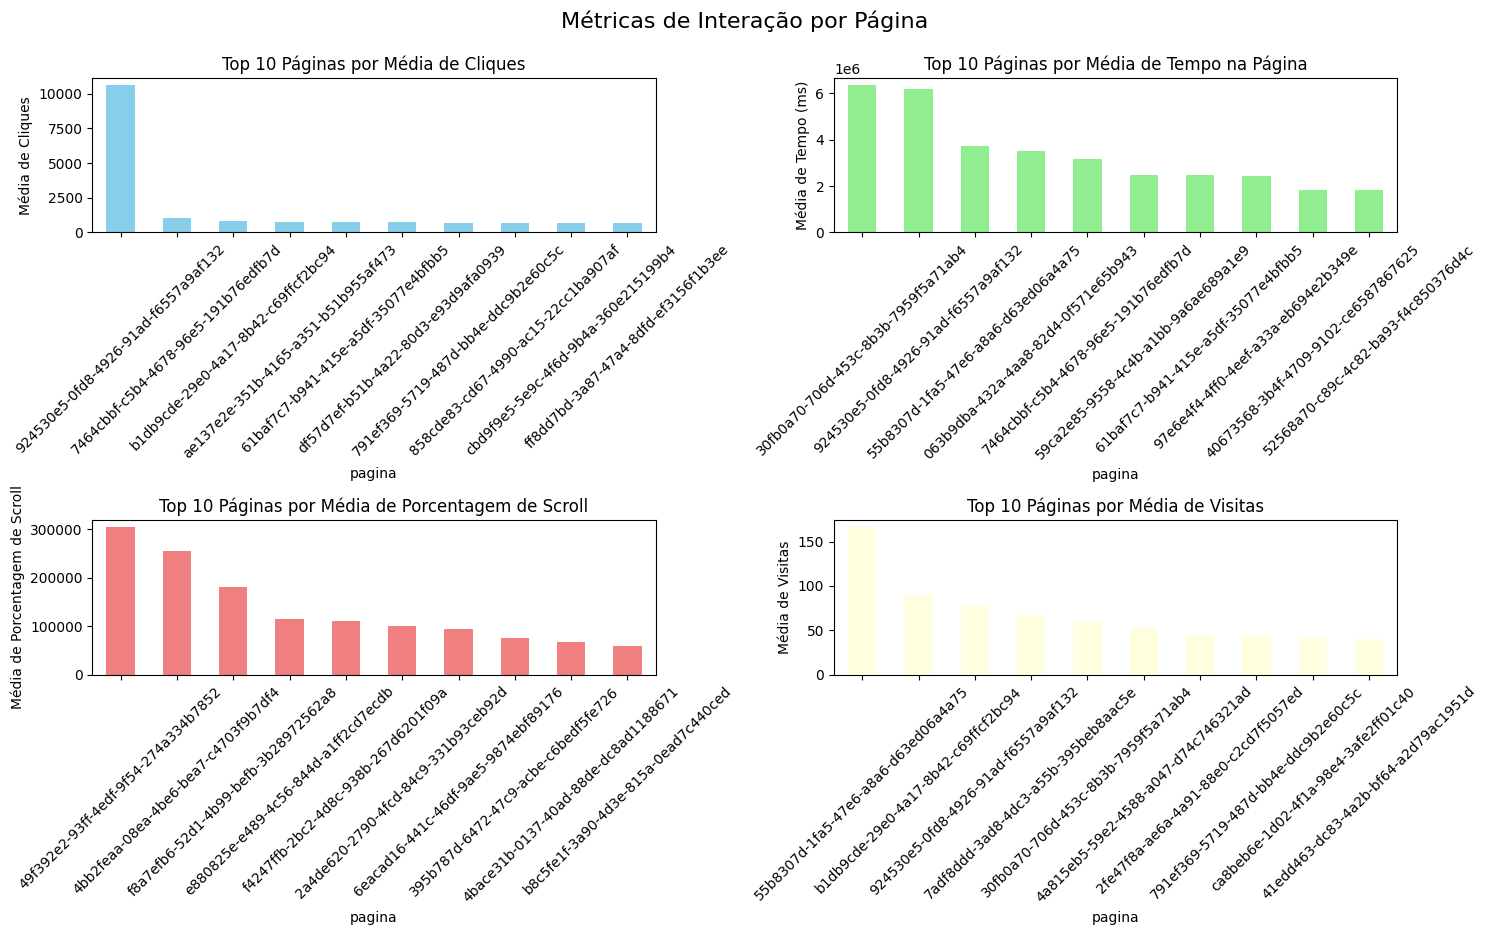

In [66]:
# Número de páginas a serem exibidas nos gráficos
n = 10

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5) # Ajustar o espaço vertical entre os subplots

# Gráfico da média de cliques
top_clicks = df_metricas_por_pagina['media_clicks'].nlargest(n)
top_clicks.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title(f'Top {n} Páginas por Média de Cliques')
axes[0, 0].set_ylabel('Média de Cliques')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico da média de tempo na página
top_tempo = df_metricas_por_pagina['media_tempo'].nlargest(n)
top_tempo.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title(f'Top {n} Páginas por Média de Tempo na Página')
axes[0, 1].set_ylabel('Média de Tempo (ms)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico da média de porcentagem de scroll
top_scroll = df_metricas_por_pagina['media_scroll'].nlargest(n)
top_scroll.plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title(f'Top {n} Páginas por Média de Porcentagem de Scroll')
axes[1, 0].set_ylabel('Média de Porcentagem de Scroll')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico da média de visitas
top_visitas = df_metricas_por_pagina['media_visitas'].nlargest(n)
top_visitas.plot(kind='bar', ax=axes[1, 1], color='lightyellow')
axes[1, 1].set_title(f'Top {n} Páginas por Média de Visitas')
axes[1, 1].set_ylabel('Média de Visitas')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajustar layout para evitar sobreposição
plt.suptitle('Métricas de Interação por Página', fontsize=16) # Adicionar um título geral
plt.show()

In [68]:
# Caminho para o arquivo de itens
caminho_arquivo_itens = 'itens/itens/itens-parte1.csv'

# Ler o arquivo CSV para um DataFrame
df_itens = pd.read_csv(caminho_arquivo_itens)

# Exibir as primeiras linhas do DataFrame de itens para verificação
print(df_itens.head())

                                   page  \
0  13db0ab1-eea2-4603-84c4-f40a876c7400   
1  92907b73-5cd3-4184-8d8c-e206aed2bf1c   
2  61e07f64-cddf-46f2-b50c-ea0a39c22050   
3  30e2e6c5-554a-48ed-a35f-6c6691c8ac9b   
4  9dff71eb-b681-40c7-ac8d-68017ac36675   

                                                 url  \
0  http://g1.globo.com/am/amazonas/noticia/2022/0...   
1  http://g1.globo.com/pa/santarem-regiao/noticia...   
2  http://g1.globo.com/mundo/noticia/2022/07/08/e...   
3  http://g1.globo.com/politica/noticia/2021/09/0...   
4  http://g1.globo.com/politica/noticia/2021/09/1...   

                      issued                   modified  \
0  2022-06-18 20:37:45+00:00  2023-04-15 00:02:08+00:00   
1  2019-06-20 17:19:52+00:00  2023-06-16 20:19:15+00:00   
2  2022-07-08 08:55:52+00:00  2023-04-15 04:25:39+00:00   
3  2021-09-09 19:06:46+00:00  2023-06-07 17:44:54+00:00   
4  2021-09-15 19:16:13+00:00  2023-06-07 17:43:39+00:00   

                                               ti

In [72]:
# Função para expandir a coluna 'history' e realizar o merge
def expandir_e_merge(row, df_itens):
    history = row['history']
    
    # Criar um DataFrame temporário com os IDs das páginas do histórico
    df_temp = pd.DataFrame({'page': history})

    # Realizar o merge com base na coluna 'Page'
    df_merged = pd.merge(df_temp, df_itens, on='page', how='left')

    return df_merged

# Aplicar a função para cada linha do DataFrame principal
df['itens_info'] = df.apply(lambda row: expandir_e_merge(row, df_itens), axis=1)

# Exibir as primeiras linhas com a nova coluna
print(df[['userId', 'history', 'itens_info']].head())

KeyboardInterrupt: 